# Brunei Country

In [1]:
import pandas as pd
from pathlib import Path
import datetime

import math
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.formula.api as sm
from statsmodels.tsa import tsatools, stattools
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics import tsaplots

from sklearn.metrics import mean_squared_error

%matplotlib inline

In [2]:
menhap_df = pd.read_excel("D:/PENS/Semester_4/Data Mining/PBL_Datamining/final_data.xlsx")
menhap_df

,country,year,Schizophrenia,Bipolar,Eating_Disorders,Anxiety,Drug_Use,Depression,Alcohol_Use,Life_Ladder,Log_GDP_per_Capita,Social_Support,Life_Expectancy,Freedom,Generosity,Corruption,Positive_Affect,Negative_Affect,Ladder_Std_Dev,GINI_Index
0,Brunei,1990,0.274544,0.617719,0.550731,3.548453,0.911231,2.577977,0.771017,6.233732,10.826301,0.790585,70.994705,0.767580,0.073472,0.062403,0.569497,0.166263,2.052102,0.622453
1,Brunei,1991,0.273819,0.618347,0.548010,3.554565,0.910156,2.562828,0.770862,6.437663,11.145486,0.793567,73.141360,0.789073,0.054550,0.226984,0.550824,0.112444,2.006036,0.584078
2,Brunei,1992,0.273212,0.618986,0.545544,3.561621,0.910287,2.551382,0.770430,6.586561,10.776199,0.823234,73.563922,0.787172,0.043634,0.148619,0.712836,0.185052,2.053332,0.560275
3,Brunei,1993,0.272736,0.619673,0.543644,3.569155,0.910409,2.543804,0.769584,6.821280,11.119712,0.811811,71.970894,0.801130,0.071169,0.054491,0.472039,0.127140,2.031076,0.612157
4,Brunei,1994,0.272383,0.620342,0.542626,3.576319,0.908915,2.538465,0.768343,6.192638,10.400065,0.752147,73.270498,0.705897,0.086336,0.107812,0.650715,0.138546,2.073008,0.559053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,Vietnam,2013,0.241026,0.550479,0.119353,2.039645,0.673579,2.884934,1.722689,5.022699,8.541249,0.759477,65.545815,0.919607,-0.024637,0.771246,0.718431,0.165225,1.404304,0.381849
304,Vietnam,2014,0.241883,0.551005,0.121583,2.045305,0.677829,2.882767,1.728448,5.084923,8.588622,0.792168,65.677925,0.845240,0.002126,0.779896,0.701386,0.240607,1.769163,0.414816
305,Vietnam,2015,0.242783,0.551548,0.123609,2.051937,0.682933,2.881750,1.733233,5.076315,8.642591,0.848677,65.810028,0.897333,0.087220,0.747188,0.642237,0.232416,1.794858,0.398138
306,Vietnam,2016,0.243709,0.552084,0.126256,2.059037,0.687896,2.879813,1.736929,5.062267,8.692120,0.876324,65.942139,0.894351,-0.088430,0.799240,0.536226,0.222550,1.767819,0.375812


In [3]:
menhap_df.dtypes

country                object
year                    int64
Schizophrenia         float64
Bipolar               float64
Eating_Disorders      float64
Anxiety               float64
Drug_Use              float64
Depression            float64
Alcohol_Use           float64
Life_Ladder           float64
Log_GDP_per_Capita    float64
Social_Support        float64
Life_Expectancy       float64
Freedom               float64
Generosity            float64
Corruption            float64
Positive_Affect       float64
Negative_Affect       float64
Ladder_Std_Dev        float64
GINI_Index            float64
dtype: object

In [4]:
lifeladder_df = menhap_df.loc[:, ["year", 'country', 'Life_Ladder']]
lifeladder_df

,year,country,Life_Ladder
0,1990,Brunei,6.233732
1,1991,Brunei,6.437663
2,1992,Brunei,6.586561
3,1993,Brunei,6.821280
4,1994,Brunei,6.192638
...,...,...,...
303,2013,Vietnam,5.022699
304,2014,Vietnam,5.084923
305,2015,Vietnam,5.076315
306,2016,Vietnam,5.062267


In [5]:
# Mengambil data untuk country tertentu
brunei_df = lifeladder_df.loc[lifeladder_df['country'] == 'Brunei']
brunei_df

,year,country,Life_Ladder
0,1990,Brunei,6.233732
1,1991,Brunei,6.437663
2,1992,Brunei,6.586561
3,1993,Brunei,6.821280
4,1994,Brunei,6.192638
5,1995,Brunei,6.348373
6,1996,Brunei,6.734922
7,1997,Brunei,6.597460
8,1998,Brunei,6.598677
9,1999,Brunei,6.680745


### model SES

C:\Users\DELL\AppData\Local\Temp\ipykernel_17232\1491259404.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brunei_df['year'] = pd.to_datetime(brunei_df['year'], format='%Y')


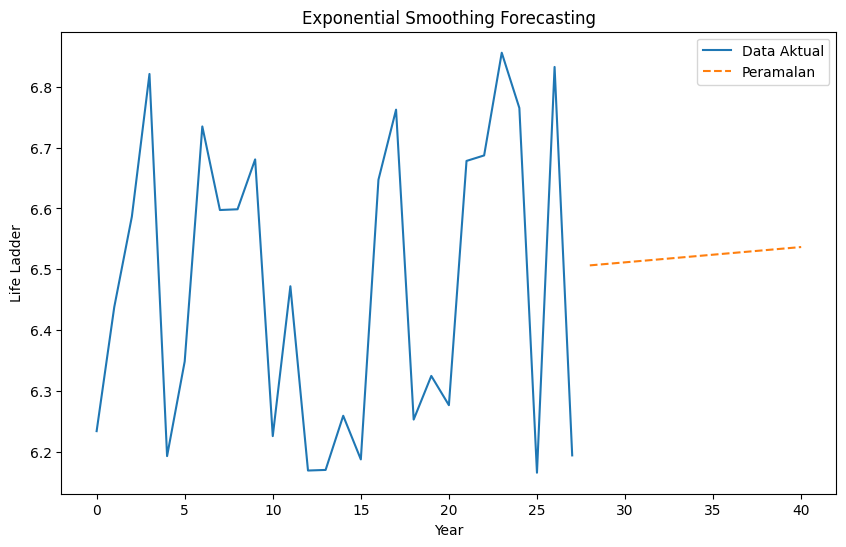

         year  forecast
28 2018-12-31  6.506382
29 2019-12-31  6.508898
30 2020-12-31  6.511414
31 2021-12-31  6.513930
32 2022-12-31  6.516446
33 2023-12-31  6.518962
34 2024-12-31  6.521478
35 2025-12-31  6.523994
36 2026-12-31  6.526510
37 2027-12-31  6.529026
38 2028-12-31  6.531542
39 2029-12-31  6.534058
40 2030-12-31  6.536574


In [6]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Pilih kolom Life Ladder untuk peramalan
brunei_df['year'] = pd.to_datetime(brunei_df['year'], format='%Y')
life_ladder_series = brunei_df['Life_Ladder']

# Buat model Exponential Smoothing
model = ExponentialSmoothing(life_ladder_series, trend='add', seasonal=None, seasonal_periods=None)
fit = model.fit()

# Buat prediksi untuk beberapa tahun ke depan
forecast = fit.forecast(steps=13)

# Plot hasil
plt.figure(figsize=(10, 6))
plt.plot(life_ladder_series, label='Data Aktual')
plt.plot(forecast, label='Peramalan', linestyle='--')
plt.legend(loc='best')
plt.title('Exponential Smoothing Forecasting')
plt.xlabel('Year')
plt.ylabel('Life Ladder')
plt.show()

# Tampilkan DataFrame hasil peramalan
forecast_years = pd.date_range(start='2018-01-01', periods=13, freq='Y')
forecast_df = pd.DataFrame({'year': forecast_years, 'forecast': forecast})

print(forecast_df)



### Moving Average

C:\Users\DELL\AppData\Local\Temp\ipykernel_17232\2083970166.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brunei_df['Moving Average'] = brunei_df['Life_Ladder'].rolling(window=window_size).mean()


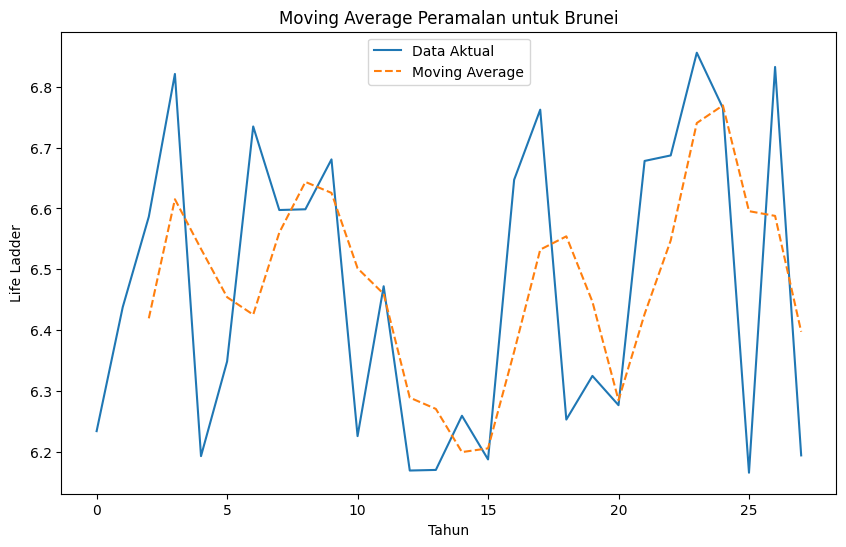

In [7]:
# Hitung Moving Average (misalnya dengan jendela waktu 3 tahun)
window_size = 3
brunei_df['Moving Average'] = brunei_df['Life_Ladder'].rolling(window=window_size).mean()

# Plot hasilnya
plt.figure(figsize=(10, 6))
plt.plot(brunei_df['Life_Ladder'], label='Data Aktual')
plt.plot(brunei_df['Moving Average'], label='Moving Average', linestyle='--')
plt.legend(loc='best')
plt.title('Moving Average Peramalan untuk Brunei')
plt.xlabel('Tahun')
plt.ylabel('Life Ladder')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_17232\2742213950.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brunei_df['Moving Average'] = brunei_df['Life_Ladder'].rolling(window=window_size).mean()


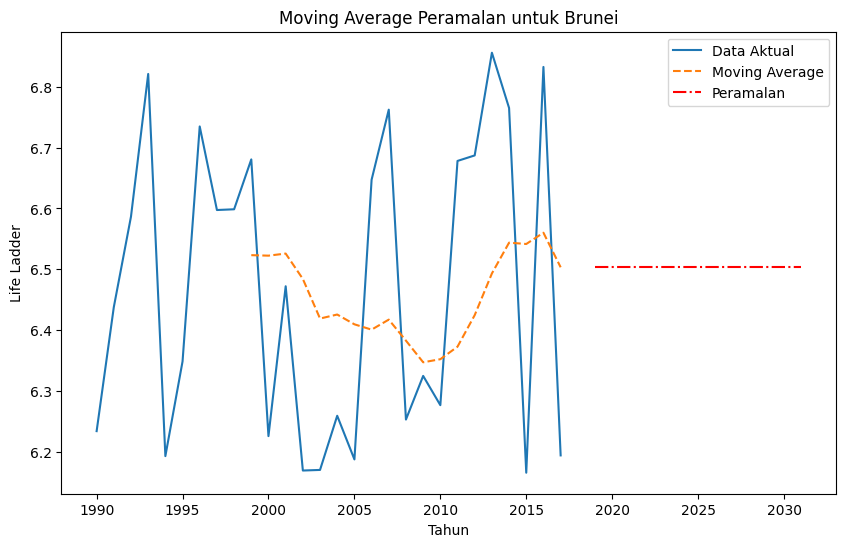

         year  forecast
28 2018-12-31  6.506382
29 2019-12-31  6.508898
30 2020-12-31  6.511414
31 2021-12-31  6.513930
32 2022-12-31  6.516446
33 2023-12-31  6.518962
34 2024-12-31  6.521478
35 2025-12-31  6.523994
36 2026-12-31  6.526510
37 2027-12-31  6.529026
38 2028-12-31  6.531542
39 2029-12-31  6.534058
40 2030-12-31  6.536574


In [8]:
# Hitung Moving Average (misalnya dengan jendela waktu 3 tahun)
window_size = 10
brunei_df['Moving Average'] = brunei_df['Life_Ladder'].rolling(window=window_size).mean()
brunei_df.set_index('year', inplace=True)

# Prediksi 10 tahun ke depan
last_moving_avg = brunei_df['Moving Average'].iloc[-1]
forecast_years = pd.date_range(start=brunei_df.index[-1] + pd.DateOffset(years=1), periods=13, freq='Y')
forecast_values = np.full(13, last_moving_avg)

# Buat DataFrame untuk prediksi
forecast_ma = pd.DataFrame({'year': forecast_years, 'forecast': forecast_values})
forecast_ma.set_index('year', inplace=True)

# Plot hasil
plt.figure(figsize=(10, 6))
plt.plot(brunei_df['Life_Ladder'], label='Data Aktual')
plt.plot(brunei_df['Moving Average'], label='Moving Average', linestyle='--')
plt.plot(forecast_ma, label='Peramalan', linestyle='-.', color='red')
plt.legend(loc='best')
plt.title('Moving Average Peramalan untuk Brunei')
plt.xlabel('Tahun')
plt.ylabel('Life Ladder')
plt.show()

# Tampilkan DataFrame hasil peramalan
print(forecast_df)

### linear regresion

In [9]:
import pandas as pd
from pathlib import Path
import datetime

import math
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.formula.api as sm
from statsmodels.tsa import tsatools, stattools
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics import tsaplots

from sklearn.metrics import mean_squared_error

%matplotlib inline

In [10]:
# Mengambil data untuk country tertentu
brunei_df = lifeladder_df.loc[lifeladder_df['country'] == 'Brunei']
brunei_df

,year,country,Life_Ladder
0,1990,Brunei,6.233732
1,1991,Brunei,6.437663
2,1992,Brunei,6.586561
3,1993,Brunei,6.821280
4,1994,Brunei,6.192638
5,1995,Brunei,6.348373
6,1996,Brunei,6.734922
7,1997,Brunei,6.597460
8,1998,Brunei,6.598677
9,1999,Brunei,6.680745


c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Forecast Results until 2030:
    Year  Predicted Life Ladder
0   2018               6.506382
1   2019               6.508898
2   2020               6.511414
3   2021               6.513931
4   2022               6.516447
5   2023               6.518963
6   2024               6.521479
7   2025               6.523995
8   2026               6.526511
9   2027               6.529027
10  2028               6.531543
11  2029               6.534059
12  2030               6.536575


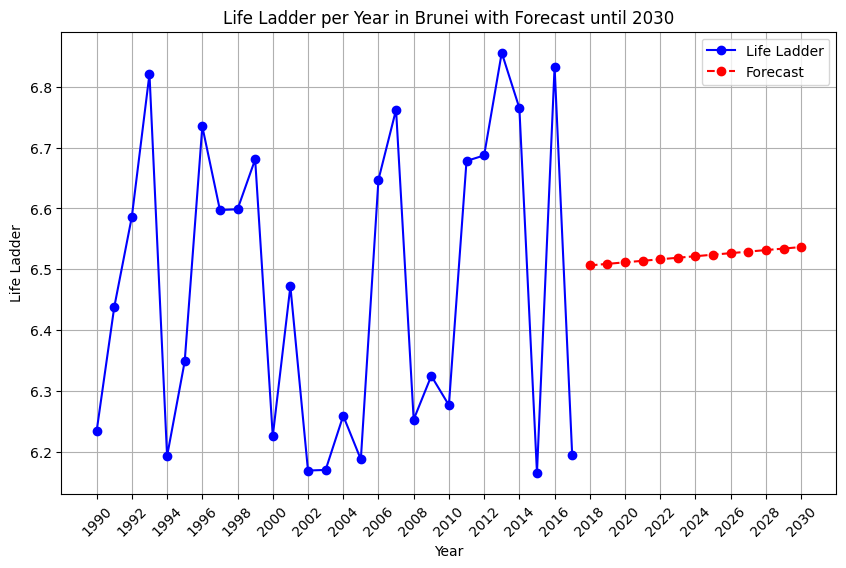

In [11]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Membagi data menjadi fitur (X) dan target (y)
X = brunei_df[['year']]  # Feature matrix
y = brunei_df['Life_Ladder']  # Target vector

# Membuat dan melatih model regresi linier
model = LinearRegression()
model.fit(X, y)

# Melakukan prediksi sampai tahun 2030
years_to_predict = range(2018, 2031)
predicted_lifeladder = model.predict(np.array(years_to_predict).reshape(-1, 1))


# Tampilkan hasil forecast
forecast_results = pd.DataFrame({
    'Year': years_to_predict,
    'Predicted Life Ladder': predicted_lifeladder
})
print("Forecast Results until 2030:")
print(forecast_results)


# Visualisasi data dan prediksi sampai tahun 2030
plt.figure(figsize=(10, 6))
plt.plot(brunei_df['year'], brunei_df['Life_Ladder'], marker='o', linestyle='-', color='b', label='Life Ladder')
plt.plot(years_to_predict, predicted_lifeladder, marker='o', linestyle='--', color='r', label='Forecast')
plt.xlabel('Year')
plt.ylabel('Life Ladder')
plt.title('Life Ladder per Year in Brunei with Forecast until 2030')
plt.xticks(np.arange(1990, 2031, step=2), rotation=45)
plt.legend()
plt.grid(True)
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
# Model Regresi Linier
X = brunei_df[['year']]
y = brunei_df['Life_Ladder']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
forecast_lr = model_lr.predict(X_test)
mae_lr = mean_absolute_error(y_test, forecast_lr)
mape_lr = np.mean(np.abs((y_test - forecast_lr) / y_test)) * 100
rmse_lr = np.sqrt(mean_squared_error(y_test, forecast_lr))

### ARIMA

In [13]:
# Mengambil data untuk country tertentu
brunei_df = lifeladder_df.loc[lifeladder_df['country'] == 'Brunei']
brunei_df['year'] = pd.to_datetime(lifeladder_df['year'], format='%Y')
brunei_df.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_17232\3103464612.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brunei_df['year'] = pd.to_datetime(lifeladder_df['year'], format='%Y')


,year,country,Life_Ladder
0,1990-01-01,Brunei,6.233732
1,1991-01-01,Brunei,6.437663
2,1992-01-01,Brunei,6.586561
3,1993-01-01,Brunei,6.821280
4,1994-01-01,Brunei,6.192638


Forecast for Brunei's Life Ladder (2018-2030):
         year  forecast
28 2018-12-31  6.441353
29 2019-12-31  6.465369
30 2020-12-31  6.467699
31 2021-12-31  6.467925
32 2022-12-31  6.467947
33 2023-12-31  6.467949
34 2024-12-31  6.467949
35 2025-12-31  6.467949
36 2026-12-31  6.467949
37 2027-12-31  6.467949
38 2028-12-31  6.467949
39 2029-12-31  6.467949
40 2030-12-31  6.467949


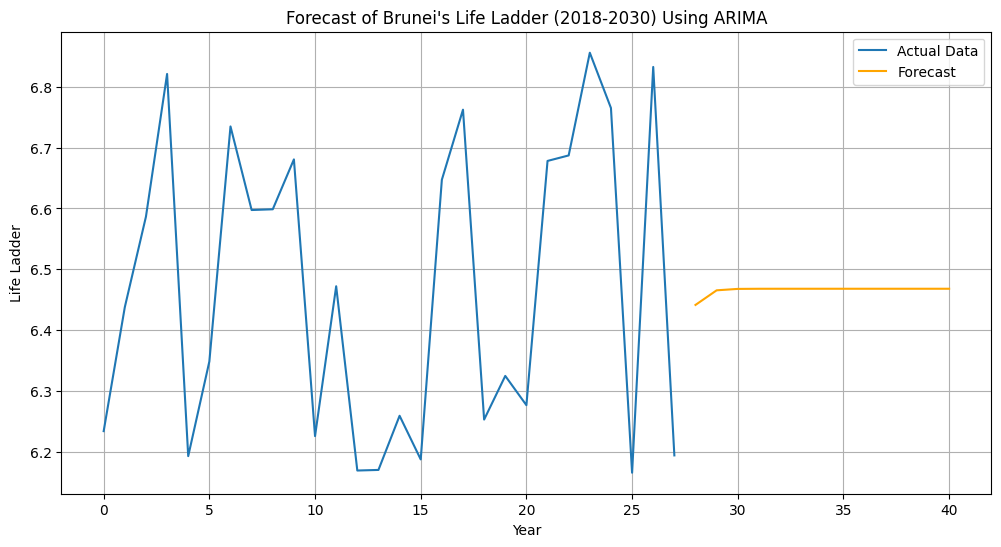

In [14]:
# ARIMA
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


# Hanya gunakan kolom 'Life Ladder' untuk analisis time series
brunei_series = brunei_df['Life_Ladder']

# Misalkan model ARIMA yang sudah kita latih sebelumnya adalah ARIMA(1,1,1)
model = ARIMA(brunei_series, order=(1, 1, 1))
model_fit = model.fit()

# Melakukan peramalan untuk 14 tahun ke depan (dari tahun 2018 hingga 2030)
forecast = model_fit.forecast(steps=13)

# Mengambil data aktual untuk membandingkan dengan peramalan
actual_values = brunei_series[-13:]

# Tampilkan hasil peramalan
print("Forecast for Brunei's Life Ladder (2018-2030):")
forecast_years = pd.date_range(start='2018-01-01', periods=13, freq='Y')
forecast_arima = pd.DataFrame({'year': forecast_years, 'forecast': forecast})
print(forecast_arima)

# Visualisasikan hasil peramalan
plt.figure(figsize=(12, 6))
plt.plot(brunei_series, label='Actual Data')
plt.plot(forecast, label='Forecast', color='orange')
plt.title("Forecast of Brunei's Life Ladder (2018-2030) Using ARIMA")
plt.xlabel('Year')
plt.ylabel('Life Ladder')
plt.legend()
plt.grid(True)
plt.show()

forecast_arima.to_excel("D:/PENS/Semester_4/Data Mining/PBL_Datamining/brunei_for_arima.xlsx", index=False)

## Evaluation Model

In [15]:
from sklearn.model_selection import train_test_split

# Bagi data menjadi set pelatihan dan pengujian (70:30)
X = brunei_df[['year']]
y = brunei_df['Life_Ladder']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model SES
model_ses = ExponentialSmoothing(y_train, trend='add', seasonal=None, seasonal_periods=None)
fit_ses = model_ses.fit()
forecast_ses = fit_ses.forecast(steps=len(X_test))
mae_ses = mean_absolute_error(y_test, forecast_ses)
mape_ses = np.mean(np.abs((y_test - forecast_ses) / y_test)) * 100
rmse_ses = np.sqrt(mean_squared_error(y_test, forecast_ses))

# Model ARIMA
model_arima = ARIMA(y_train, order=(1, 1, 1))
model_fit_arima = model_arima.fit()
forecast_arima = model_fit_arima.forecast(steps=len(X_test))
forecast_arima_values = np.array(forecast_arima)  # Convert to numpy array
mae_arima = mean_absolute_error(y_test, forecast_arima_values)
mape_arima = np.mean(np.abs((y_test - forecast_arima_values) / y_test)) * 100
rmse_arima = np.sqrt(mean_squared_error(y_test, forecast_arima_values))

# Model MA
window_size = 3
brunei_df['Moving Average'] = brunei_df['Life_Ladder'].rolling(window=window_size, min_periods=1).mean()
actual_data = brunei_df['Life_Ladder']
ma_forecast = brunei_df['Moving Average']
mae_ma = mean_absolute_error(actual_data, ma_forecast)
mape_ma = np.mean(np.abs((actual_data - ma_forecast) / actual_data)) * 100
rmse_ma = np.sqrt(mean_squared_error(actual_data, ma_forecast))


c:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWar

In [16]:
# Buat DataFrame untuk menyimpan hasil evaluasi
eval_metrics = pd.DataFrame({
    'Model': ['SES','Linier Regresion', 'Moving Average', 'ARIMA'],
    'MAE': [mae_ses,mae_lr, mae_ma, mae_arima],
    'MAPE (%)': [mape_ses, mape_lr, mape_ma, mape_arima],
    'RMSE': [rmse_ses, rmse_lr, rmse_ma, rmse_arima]
})

# Tampilkan DataFrame evaluasi
print("Evaluation Metrics:")
print(eval_metrics)

Evaluation Metrics:
              Model       MAE  MAPE (%)      RMSE
0               SES  0.347780  5.125167  0.418827
1  Linier Regresion  0.213600  3.302239  0.229953
2    Moving Average  0.153245  2.372629  0.192447
3             ARIMA  0.195977  3.061681  0.236613


In [17]:

# Data aktual dan prediksi dari masing-masing model
actual_values = [6.680745, 6.165325, 6.598677, 6.678216, 6.233732, 6.168931, 6.762527, 6.687264, 6.472058]
ses_forecast = [6.725180, 6.754371, 6.783562, 6.812753, 6.841943, 6.871134, 6.900325, 6.929516, 6.958707]
ma_forecast = [6.446622, 6.284589, 6.426407, 6.547303, 6.740564, 6.769584, 6.595604, 6.587805, 6.397320]
lr_forecast = [6.45298602, 6.47307952, 6.45173018, 6.46805615, 6.44168343, 6.45675356, 6.46303277, 6.46931199, 6.45549771]
arima_forecast = [6.64424454, 6.58319354, 6.54208919, 6.5144145, 6.49578171, 6.48323665, 6.47479033, 6.4691036, 6.46527484]

# Tanggal mulai dan akhir
start_date = '2009-01-01'
end_date = '2018-01-01'

# Buat range tanggal dari start_date hingga end_date
date_range = pd.date_range(start=start_date, end=end_date, freq='Y')

# Buat DataFrame untuk tabel prediksi dengan kolom tahun
predictions_table = pd.DataFrame({
    'Year': date_range,
    'Actual': actual_values,
    'SES Forecast': forecast_ses,
    'Linier Regresion Forecast' : forecast_lr,
    'MA Forecast': ma_forecast,
    'ARIMA Forecast': forecast_arima
})
# Menampilkan tabel hasil prediksi
print("Hasil Prediksi:")
predictions_table


Hasil Prediksi:


,Year,Actual,SES Forecast,Linier Regresion Forecast,MA Forecast,ARIMA Forecast
19,2009-12-31,6.680745,6.725180,6.452986,6.446622,6.644245
20,2010-12-31,6.165325,6.754371,6.473080,6.284589,6.583194
21,2011-12-31,6.598677,6.783562,6.451730,6.426407,6.542089
22,2012-12-31,6.678216,6.812753,6.468056,6.547303,6.514414
23,2013-12-31,6.233732,6.841943,6.441683,6.740564,6.495782
24,2014-12-31,6.168931,6.871134,6.456754,6.769584,6.483237
25,2015-12-31,6.762527,6.900325,6.463033,6.595604,6.474790
26,2016-12-31,6.687264,6.929516,6.469312,6.587805,6.469104
27,2017-12-31,6.472058,6.958707,6.455498,6.397320,6.465275
